In [7]:
import numpy as np
import ProjectPacks as pp
%matplotlib inline
import matplotlib.pylab as plt
plt.rcParams['figure.figsize'] = (18, 6)

In [8]:
#read in array set-up file save in a dictionary. 
#Files are  'Array_Profile.txt', 'Field_Profile.txt'
Array,Field= pp.getSParams('Array_Profile.txt', 'Field_Profile.txt')
#formating: saving dictionary details into variables for immediate use string->numerics
Amp,l,m,ut,vt,arrayHxpos = pp.formatSParams('Array_Profile.txt', 'Field_Profile.txt', td= 300)
print(Array)
print(Field)

{'Num_Array': '3', 'Centre_Dist': '15,24,39', 'Centre_Freq': '1.4e9'}
{'HourAngleInterval': '-6,6', 'FieldCentreDecl': '65', 'NumSources': '1', 'SourceParams': '5,-0.8,0.9'}


In [9]:
print(np.shape(ut))
print(Amp,l,m)
vut= np.empty((len(ut), np.shape(ut)[2]))
print(np.shape(vut))

(3, 3, 300)
[5.0] [-0.80000000000000004] [0.90000000000000002]
(3, 300)


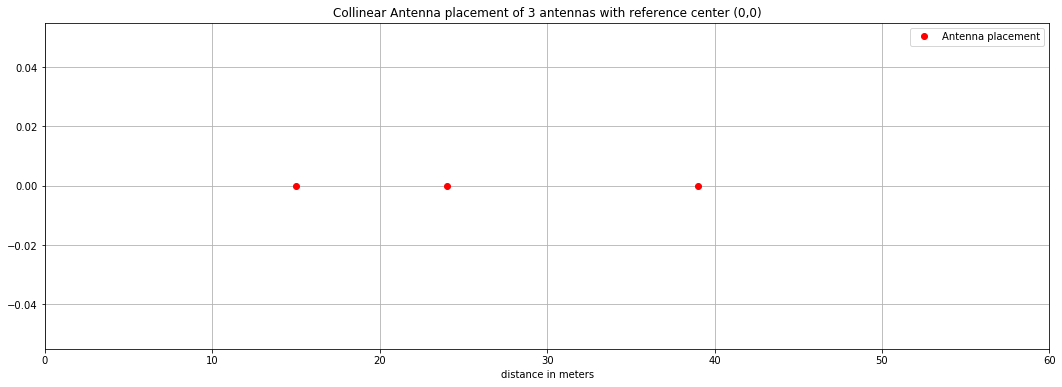

In [10]:
#plotting antenna positions
plt.plot(arrayHxpos,[0]*len(ut), "ro", linewidth=3.0)
plt.xlim(min(arrayHxpos)-50,max(arrayHxpos)+50)
plt.title("Collinear Antenna placement of 3 antennas with reference center (0,0)")
plt.xlabel("distance in meters")
plt.xlim([0,60])
plt.legend(["Antenna placement"])
plt.grid("on")
plt.show()

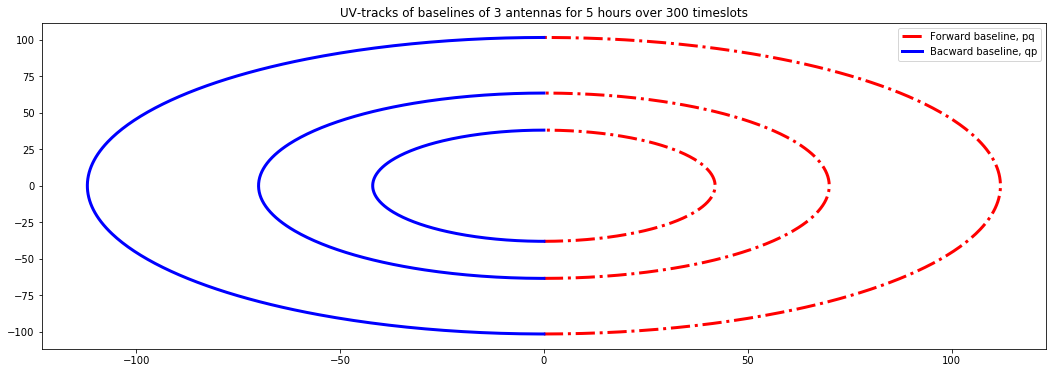

In [11]:
## plotting the baselines with 600 time-divisions
for k in range(len(ut)):
    for i in range(k,len(ut)):
        plt.plot(ut[k][i],vt[k][i],"r-.", ut[i][k],vt[i][k],"b-", linewidth= 3.0)
plt.title("UV-tracks of baselines of 3 antennas for 5 hours over 300 timeslots")
plt.legend(["Forward baseline, pq","Bacward baseline, qp"])
plt.show()

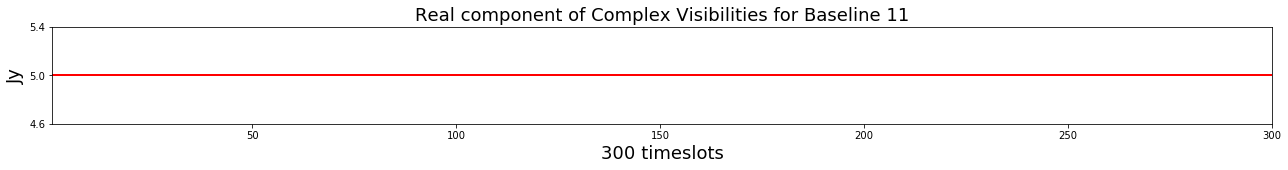

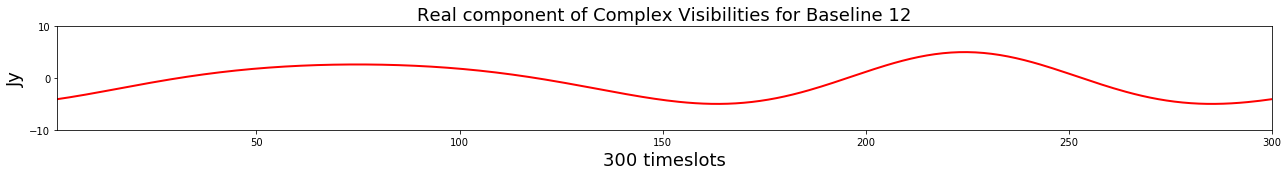

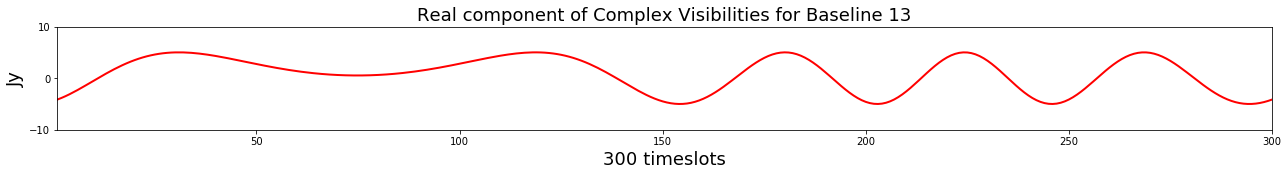

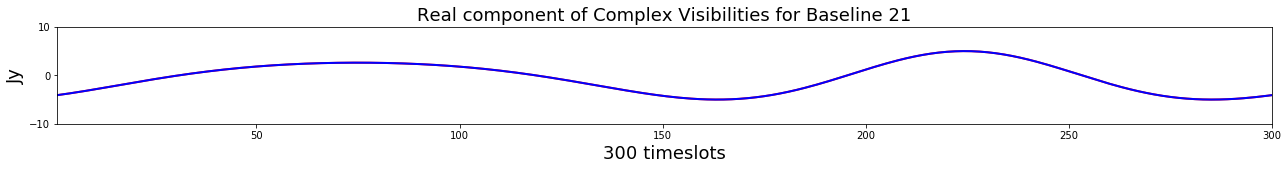

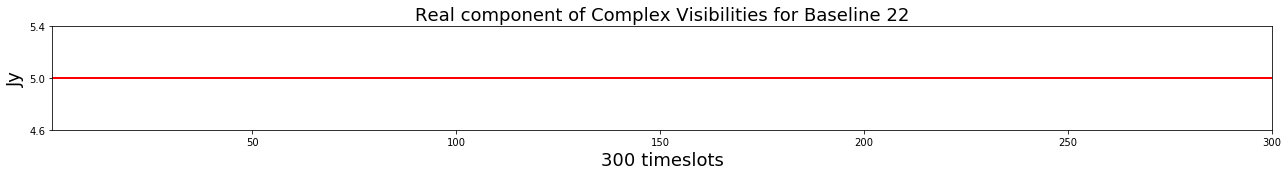

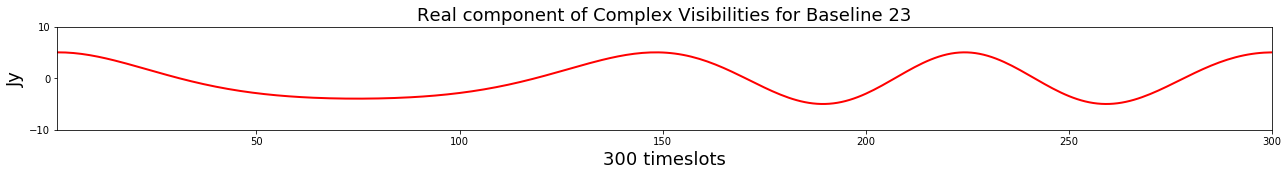

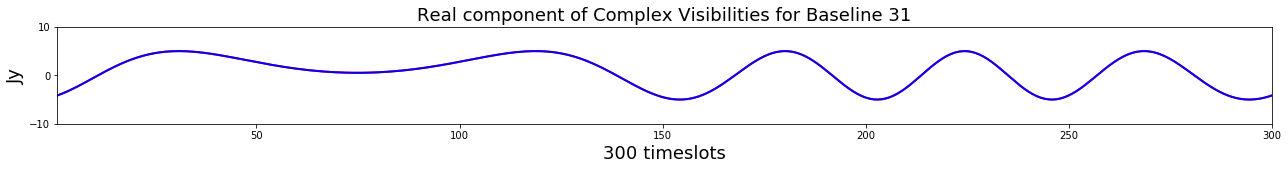

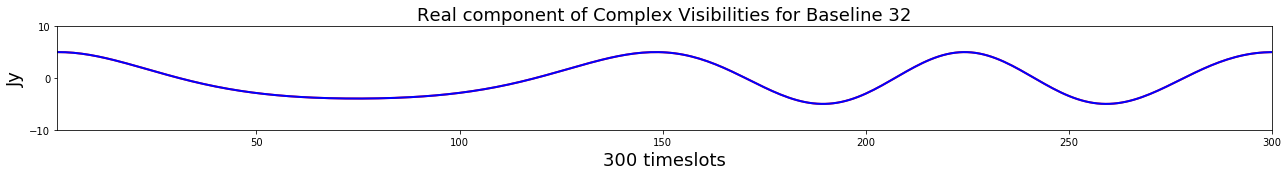

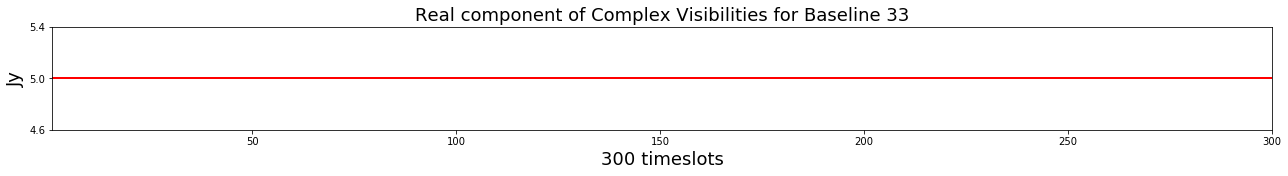

In [12]:
## Visibility matrix:
V= np.zeros(np.shape(ut),dtype= complex)

timeslots = np.cumsum(np.ones((len(V[0,1,:]),)))
plotdim= (len(ut)*100+11)+np.arange(len(ut))



for k in range(len(ut)):
    fig = plt.figure()
    for i in range(len(ut)):
        for n in range(len(Amp)):
            V[k][i]+= Amp[n]*np.exp(-2*np.pi*1j*(np.radians(l[n])*ut[i][k]+np.radians(m[n])*vt[i][k]))
       
    #Plotting Baseline ki
        ax = plt.subplot("%i"%plotdim[i])
        ax.set_title("Real component of Complex Visibilities for Baseline %i%i"%(1+k,1+i), fontsize=18)
        ax.plot(timeslots,V[k,i,:].real, "r", linewidth=2)
        
        if k > i:
            ax.plot(timeslots,V[k,i,:].real, "b", linewidth=2)
#         ax.plot(timeslots,V[k,i,:].imag, "m")
        ax.set_xlabel("300 timeslots", fontsize=18)
        ax.set_ylabel("Jy", fontsize=18)
        ax.set_xlim([1,len(V[k,i,:])])
        #ax.legend(["Real component","Imaginary component"],loc='upper right')
        y_t = ax.get_yticks()
        y_t = y_t[::2]
        ax.set_yticks(y_t)

        plt.tight_layout()
        plt.show()

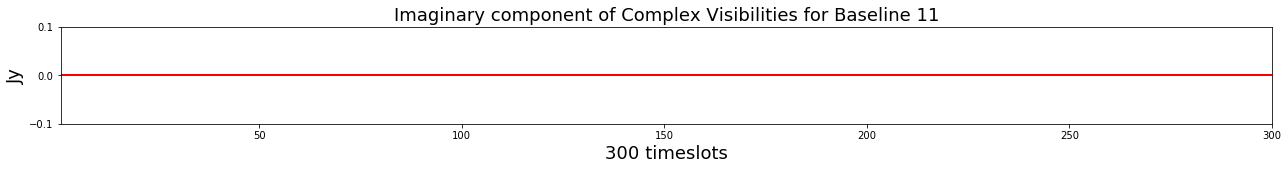

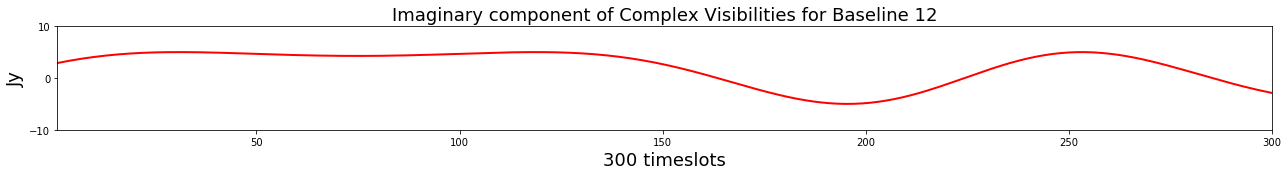

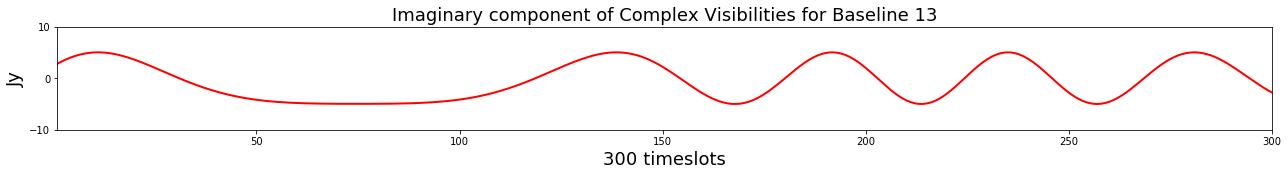

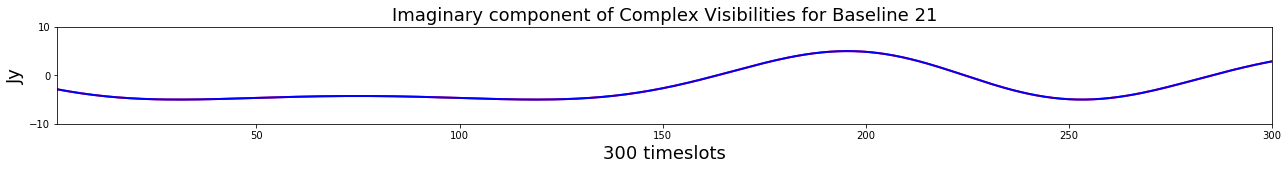

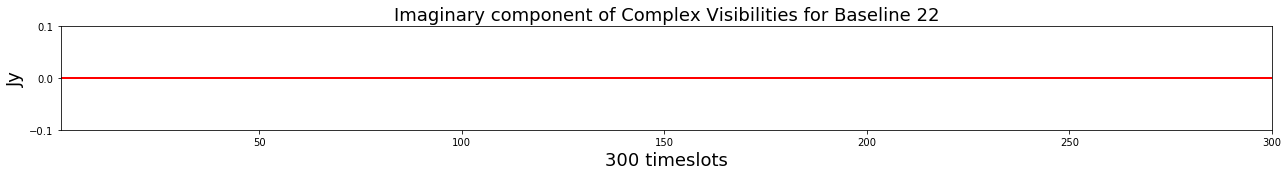

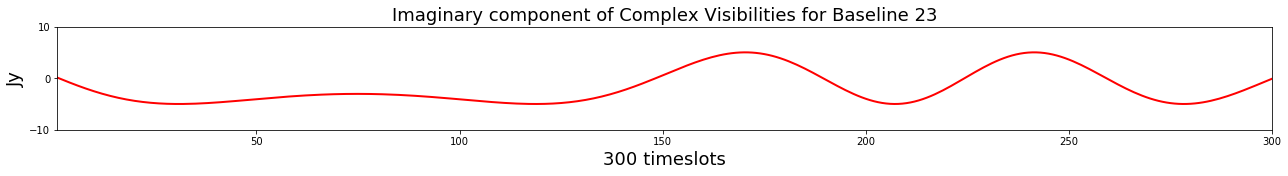

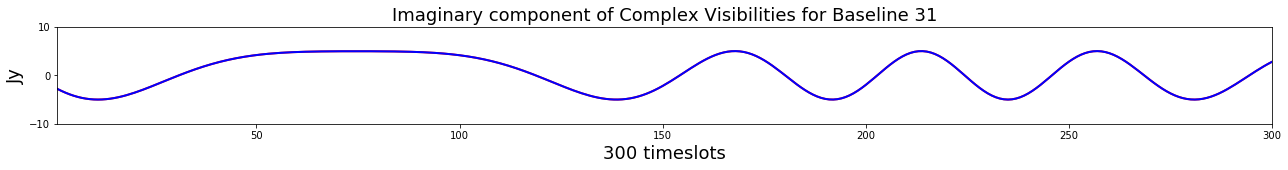

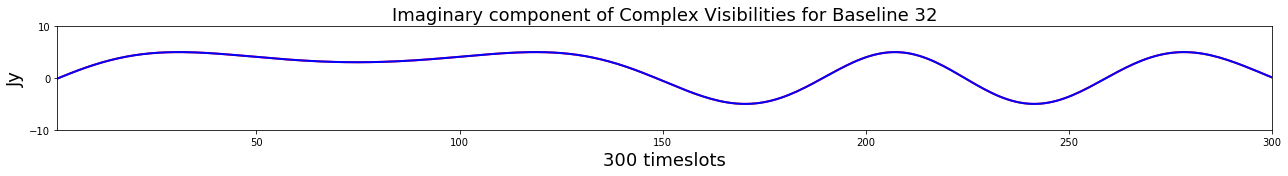

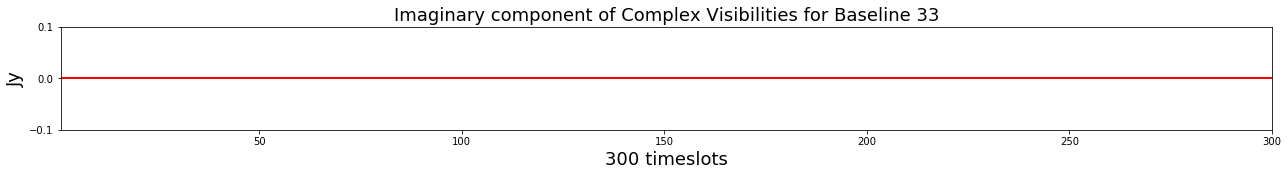

In [14]:
## Visibility matrix:
V= np.zeros(np.shape(ut),dtype= complex)

timeslots = np.cumsum(np.ones((len(V[0,1,:]),)))
plotdim= (len(ut)*100+11)+np.arange(len(ut))

for k in range(len(ut)):
    fig = plt.figure()
    for i in range(len(ut)):
        for n in range(len(Amp)):
            V[k][i]+= Amp[n]*np.exp(-2*np.pi*1j*(np.radians(l[n])*ut[i][k]+np.radians(m[n])*vt[i][k]))
       
    #Plotting Baseline ki
        ax = plt.subplot("%i"%plotdim[i])
        ax.set_title("Imaginary component of Complex Visibilities for Baseline %i%i"%(1+k,1+i), fontsize=18)
        ax.plot(timeslots,V[k,i,:].imag, "r", linewidth=2)
        if k> i:
            ax.plot(timeslots,V[k,i,:].imag, "b", linewidth=2)
        
        ax.set_xlabel("300 timeslots", fontsize=18)
        ax.set_ylabel("Jy", fontsize=18)
        ax.set_xlim([1,len(V[k,i,:])])
        #ax.legend(["Real component","Imaginary component"],loc='upper right')
        y_t = ax.get_yticks()
        y_t = y_t[::2]
        ax.set_yticks(y_t)

        plt.tight_layout()
        plt.show()

In [15]:
plt.legend?

In [16]:
## Visibility matrix:
V= np.zeros(np.shape(ut),dtype= complex)

timeslots = np.cumsum(np.ones((len(V[0,1,:]),)))
plotdim= (ArNum*100+11)+np.arange(ArNum)

for k in range(ArNum):
    fig = plt.figure()
    for i in range(ArNum):
        for n in range(SNum):
            V[k][i]+= Amp[n]*np.exp(-2*np.pi*1j*(l[n]*ut[i][k]+m[n]*vt[i][k]))
       
    #Plotting Baseline ki
        ax = plt.subplot("%i"%plotdim[i])
        ax.set_title("$V_{%i%i}$ (blue)"%(1+k,1+i), fontsize=18)
        ax.plot(timeslots,V[k,i,:].imag)
        ax.set_xlabel("Timeslot", fontsize=18)
        ax.set_ylabel("Jy", fontsize=18)
        ax.set_xlim([1,len(V[k,i,:])])
        y_t = ax.get_yticks()
        y_t = y_t[::2]
        ax.set_yticks(y_t)

        plt.tight_layout()
        plt.show()

NameError: name 'ArNum' is not defined

In [15]:
import random
random.seed(10)
Ampt= np.random.uniform(0.1,1.1)
lt= np.radians(random.randrange(-10,10,1))
mt= np.radians(random.randrange(-10,10,1))

[311 312 313]


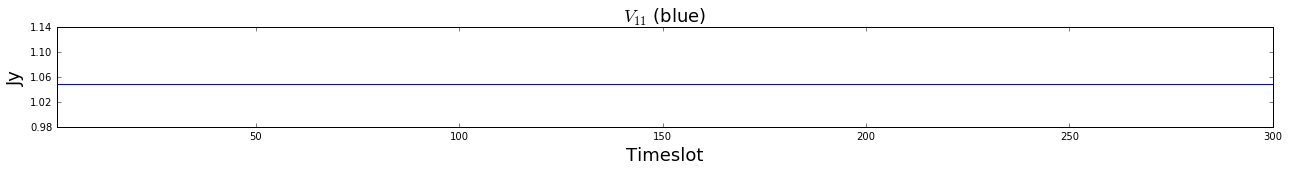

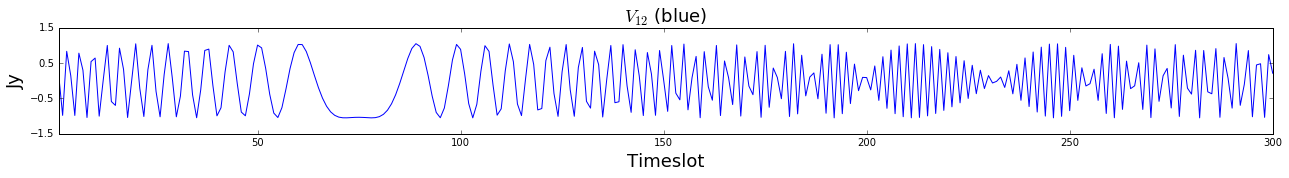

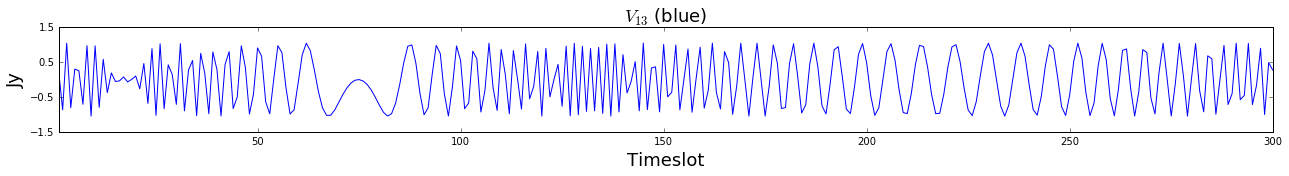

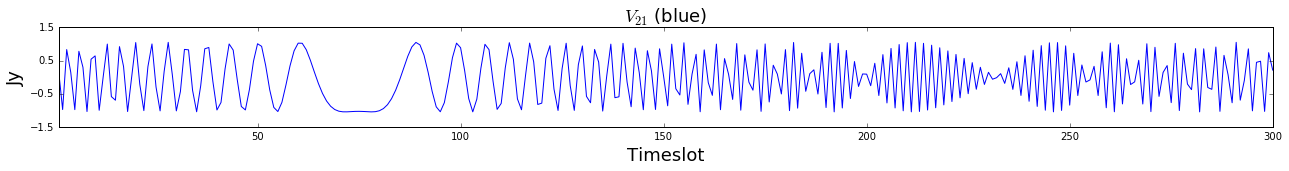

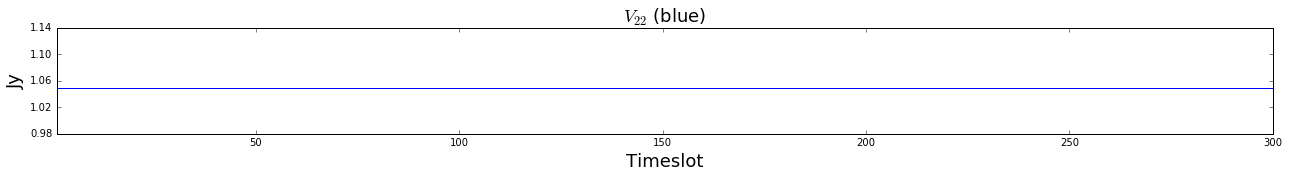

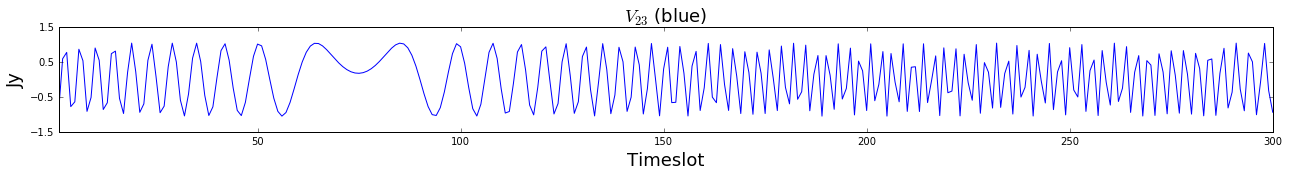

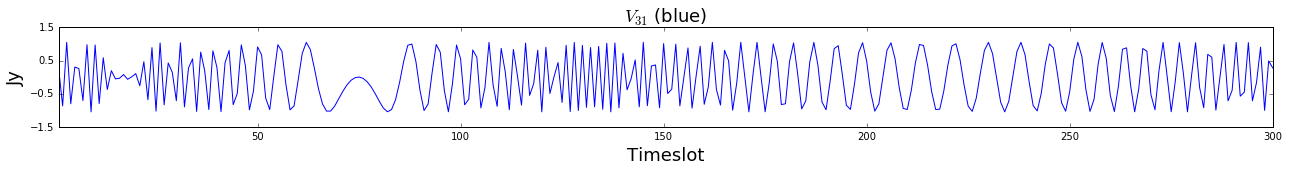

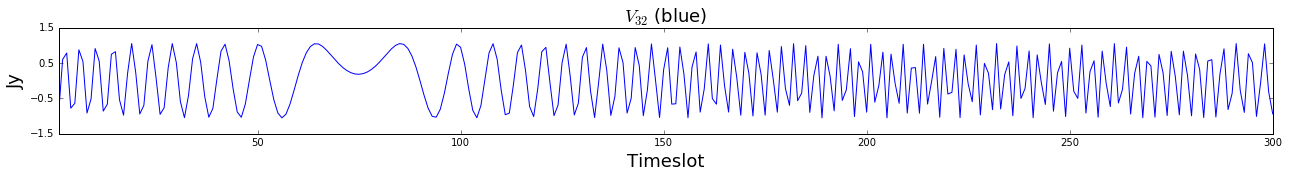

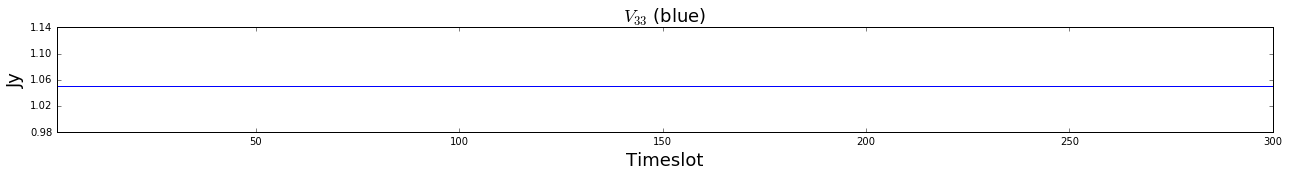

In [16]:
## Visibility matrix(of the real):
V= np.zeros(np.shape(ut),dtype= complex)

timeslots = np.cumsum(np.ones((len(V[0,1,:]),)))
plotdim= ((ArNum)*100+11)+np.arange(ArNum)
print(plotdim)

for k in range(ArNum):
    fig = plt.figure()
    for i in range(ArNum):
        for n in range(SNum):
            V[k][i]+= Ampt*np.exp(-2*np.pi*1j*(lt*ut[i][k]+mt*vt[i][k]))
       
    #Plotting Baseline ki
        ax = plt.subplot("%i"%plotdim[i])
        ax.set_title("$V_{%i%i}$ (blue)"%(1+k,1+i), fontsize=18)
        ax.plot(timeslots,V[k,i,:].real)
        ax.set_xlabel("Timeslot", fontsize=18)
        ax.set_ylabel("Jy", fontsize=18)
        ax.set_xlim([1,len(V[k,i,:])])
        y_t = ax.get_yticks()
        y_t = y_t[::2]
        ax.set_yticks(y_t)

        plt.tight_layout()
        plt.show()

[311 312 313]


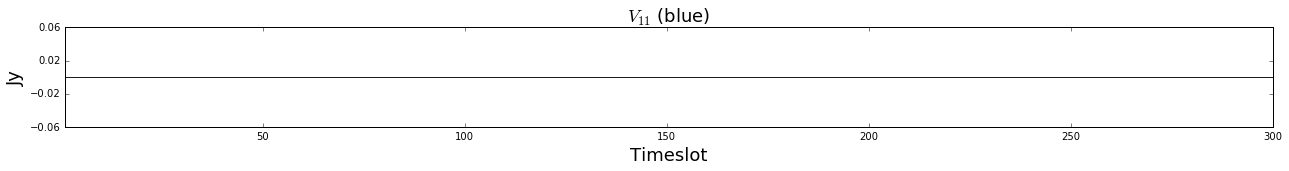

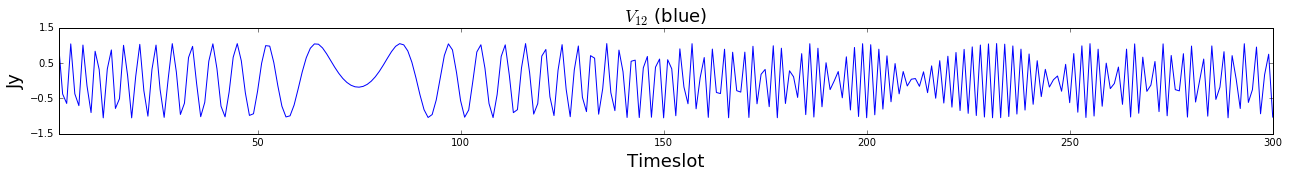

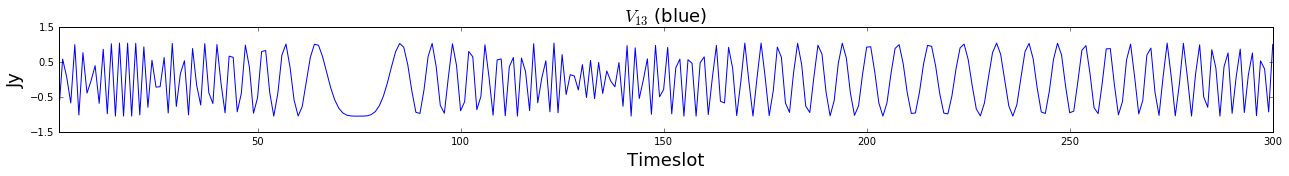

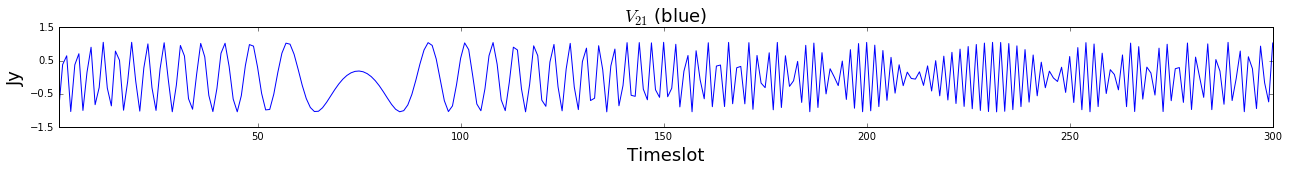

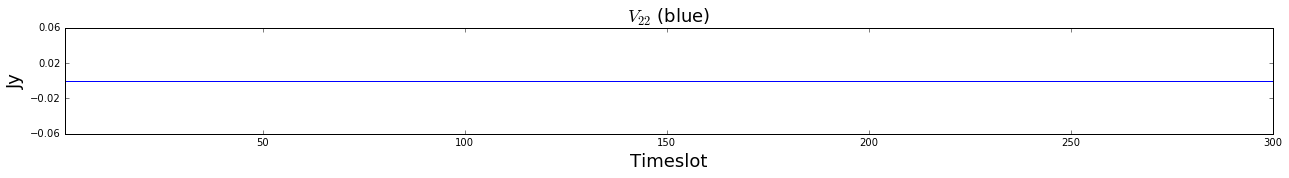

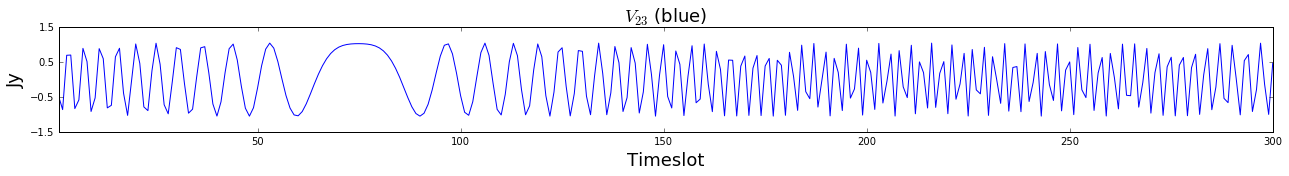

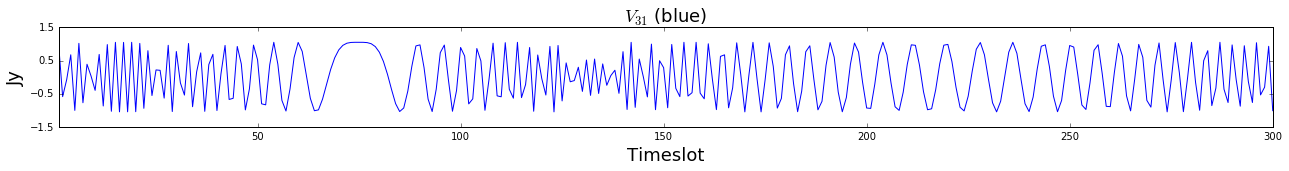

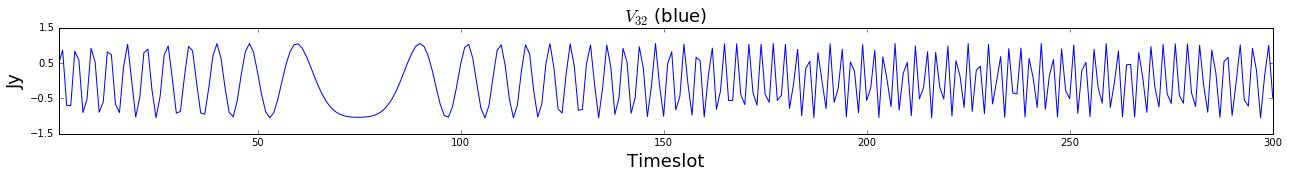

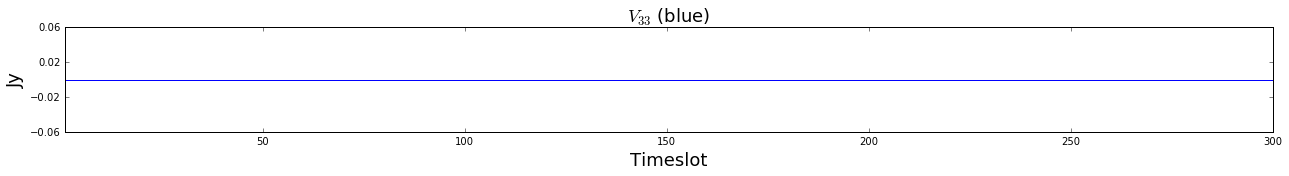

In [17]:
## Visibility matrix (of the complex):
V= np.zeros(np.shape(ut),dtype= complex)

timeslots = np.cumsum(np.ones((len(V[0,1,:]),)))
plotdim= ((ArNum)*100+11)+np.arange(ArNum)
print(plotdim)

for k in range(ArNum):
    fig = plt.figure()
    for i in range(ArNum):
        for n in range(SNum):
            V[k][i]+= Ampt*np.exp(-2*np.pi*1j*(lt*ut[i][k]+mt*vt[i][k]))
       
    #Plotting Baseline ki
        ax = plt.subplot("%i"%plotdim[i])
        ax.set_title("$V_{%i%i}$ (blue)"%(1+k,1+i), fontsize=18)
        ax.plot(timeslots,V[k,i,:].imag)
        ax.set_xlabel("Timeslot", fontsize=18)
        ax.set_ylabel("Jy", fontsize=18)
        ax.set_xlim([1,len(V[k,i,:])])
        y_t = ax.get_yticks()
        y_t = y_t[::2]
        ax.set_yticks(y_t)

        plt.tight_layout()
        plt.show()